Works of Edgar Allan Poe - Volume 1
Project Gutenberg
https://www.gutenberg.org/files/2147/2147-0.txt

In [156]:
#import libraries
from urllib.request import urlopen
import nltk
import re
import pprint
from nltk.corpus import stopwords as sw
import matplotlib.pyplot as plot

In [43]:
url = "https://www.gutenberg.org/files/2147/2147-0.txt"
raw=''
with urlopen(url) as response:
     for line in response:
         line = line.decode('utf-8')  # Decoding the binary data to text.
         raw = raw + line

In [48]:
print(type(raw))
print(len(raw))
raw[:100]

<class 'str'>
550334


'\ufeffProject Gutenberg’s The Works of Edgar Allan Poe, by Edgar Allan Poe\r\n\r\nThis eBook is for the use o'

There are 550,334 characters.  This includes spaces, characters to indicate new lines and punctuation.

In [107]:
#There is a long introduction about Edgar Allan Poe before the story begins.  
#The string will be sliced so that it only includes Poe's writing.
raw.find("THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL")
raw.rfind("END")
raw = raw[51526:531158]

In [108]:
tokens = nltk.word_tokenize(raw)
print(type(tokens))
print(len(tokens))

<class 'list'>
97005


There are 97,005 tokens.  Tokens includes words and punctuation.  (Spaces and new line characters are removed.)

In [147]:
#text = nltk.Text(tokens)
#convert all words to lower case, and remove puncutation
words = [w.lower() for w in tokens]
#words = [w.strip() for w in words]
words = [w.strip('_') for w in words]
words = [w.strip('*') for w in words]
#words = [w.strip('.') for w in words]
#words = [w.strip('!') for w in words]
#words = [w.strip('&') for w in words]
#words = [w.strip('?') for w in words]
#words = [w.strip(';') for w in words]
#words = [w.strip('-') for w in words]
#words = [w.strip(',') for w in words]
#words = [w.strip('(') for w in words]
#words = [w.strip(')') for w in words]
#words = [w.strip(':') for w in words]
#words = [w.strip('[') for w in words]
#words = [w.strip(']') for w in words]
#words = [w.strip('"') for w in words]
#words = [w.strip('') for w in words]
#words = [w.strip('’') for w in words]
#words = [w.strip('”') for w in words]
#remove numbers and punctuation
nonPunct = re.compile('.*[A-Za-z].*')
words = [w for w in words if nonPunct.match(w)]
#remove stop words
words = [word for word in words if word not in sw.words('english')]




In [161]:
print('There are '+ str(len(words)) + ' words present in the corpus.')

There are 39186 words present in the corpus


In [148]:
vocab = sorted(set(words))
vocab[:1000]

['-satisfying',
 '.fleet',
 '10th',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '16th',
 '17th',
 '18th',
 '19th',
 '3d',
 '3h',
 '4th',
 '5th',
 '6th',
 '6th_.',
 '7th',
 '8th',
 '9_th',
 '9th',
 'a-kimbo',
 'a.',
 'a.m.',
 'abandon',
 'abandoned',
 'abandoning',
 'abbreviation',
 'aberration',
 'abide',
 'abilities',
 'ability',
 'abject',
 'able',
 'abnormal',
 'abominable',
 'abound',
 'abounding',
 'about.',
 'above-named',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absented',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstract',
 'abstracted',
 'abstraction',
 'abstruse',
 'abstruseness',
 'absurd',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abyss',
 'abysses',
 'accelerated',
 'accelerating',
 'acceleration',
 'accents',
 'accepted',
 'accession',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'acclamation',
 'accompanied',
 'accompany',
 'accompanying',
 'accomplice',
 'accomplices',
 'accomplish',
 'accompli

In [154]:
fdist = nltk.FreqDist(words)
most_common_200 = fdist.most_common(200)
fdist.most_common(50)

[('upon', 378),
 ('one', 266),
 ('could', 219),
 ('would', 219),
 ('found', 147),
 ('us', 138),
 ('great', 124),
 ('time', 123),
 ('much', 120),
 ('first', 112),
 ('two', 110),
 ('thus', 106),
 ('say', 105),
 ('little', 102),
 ('made', 102),
 ('however', 101),
 ('well', 100),
 ('without', 99),
 ('must', 99),
 ('even', 97),
 ('three', 97),
 ('said', 95),
 ('balloon', 92),
 ('let', 90),
 ('may', 90),
 ('de', 88),
 ('body', 86),
 ('might', 86),
 ('far', 83),
 ('whole', 78),
 ('marie', 75),
 ('nothing', 74),
 ('although', 74),
 ('earth', 73),
 ('point', 72),
 ('still', 71),
 ('yet', 71),
 ('feet', 71),
 ('head', 69),
 ('day', 68),
 ('means', 67),
 ('see', 67),
 ('left', 66),
 ('indeed', 64),
 ('every', 64),
 ('corpse', 64),
 ('long', 63),
 ('within', 63),
 ('manner', 60),
 ('man', 60)]

In [150]:
uniq_words = set(words)
len(uniq_words)

8713

There are 8,713 unique words.

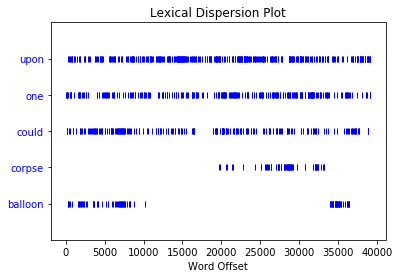

In [157]:
text= nltk.Text(words)
text.dispersion_plot(["upon", "one", "could", "corpse", "balloon"])
plot.show()

The dispersion plot above shows some of the most common words in the corpus.  The most common words are 'upon,' 'one,' and 'could' and they are present fairly uniformly throughout the text.  Since Poe is known for frightful stories, we also looked at the use of word 'corpse,' which is only present in the second half of the corpus.  The word 'balloon' was very common.  This was a surprise and it is present at the beginning and end of the corpus.